In [1]:
import numpy as np
import pandas as pd
from sklearn import svm, metrics,preprocessing
#from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc
from matplotlib import pyplot as plt
from collections import Counter
from scipy.stats import norm
# import seaborn as sns; sns.set(font_scale=1.2)
%matplotlib inline

In [2]:
path="/home/sultan/EEG/Source_level_frequency_analysis/100_base_corr_sam_NHIerp_band_features_noise.csv"
## the below one is the band_features
##path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_clear.csv"
# path="/home/sultan/EEG/Source_level_frequency_analysis/100sam_NHIerp_band_features_noise.csv"
dataset =pd.read_csv(path)

In [3]:
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(Xc)

In [4]:
rs=30

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=rs) 

In [6]:
X_test.shape, y_test.shape

((361, 272), (361,))

In [7]:
np.unique(y_test)
np.unique(y_test,return_counts=True)

(array([0., 1.]), array([130, 231]))

# Grid search

In [8]:
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 6.5, 10,20,100,1000],'gamma':[0.01,0.002,0.00069,0.0007,0.0005]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'C': [1, 6.5, 10, 20, 100, 1000], 'gamma': [0.01, 0.002, 0.00069, 0.0007, 0.0005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [9]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[0.90,1.00,1.25],'gamma':[3.0,3.25,3.25 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [10]:
# Average Scores
#  print clf.cv_results_
# clf.best_estimator_
# np.mean
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))

Accuracy:0.885 (+/-0.082)


In [11]:
pred=clf.best_estimator_.predict(X_test)
acc=clf.score(X_test, y_test)
print ("Accuracy:", acc)  
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

('Accuracy:', 0.925207756232687)
support: 46.426092991


In [12]:
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[112,  18],
       [  9, 222]])

In [13]:
from sklearn.metrics import classification_report
#target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.93      0.86      0.89       130
        1.0       0.93      0.96      0.94       231

avg / total       0.93      0.93      0.92       361



In [14]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9112887112887114

In [15]:
clf.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Whole brain accuracy and AUC

In [16]:
whc=pd.DataFrame([acc,roc_auc])
whc

,0
0,0.925208
1,0.911289


In [17]:
# cv=5
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1],'gamma':[0.01 ]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters,cv=cv)
# clf.fit(X_train, y_train)

In [18]:
k=0;j=68; acgw=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgw=np.append(acgw,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    print(classification_report(y_test, pred))
    k=k+68;j=j+68;

Accuracy:0.824 (+/-0.037)
0.8559556786703602
0 68
             precision    recall  f1-score   support

        0.0       0.77      0.85      0.81       130
        1.0       0.91      0.86      0.88       231

avg / total       0.86      0.86      0.86       361

Accuracy:0.832 (+/-0.039)
0.8559556786703602
68 136
             precision    recall  f1-score   support

        0.0       0.77      0.86      0.81       130
        1.0       0.92      0.85      0.88       231

avg / total       0.86      0.86      0.86       361

Accuracy:0.873 (+/-0.072)
0.9030470914127424
136 204
             precision    recall  f1-score   support

        0.0       0.86      0.88      0.87       130
        1.0       0.93      0.92      0.92       231

avg / total       0.90      0.90      0.90       361

Accuracy:0.901 (+/-0.104)
0.9362880886426593
204 272
             precision    recall  f1-score   support

        0.0       0.91      0.92      0.91       130
        1.0       0.95      0.95      0.

In [19]:
clf.best_estimator_

SVC(C=40, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.021, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
###This is the for last data only
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.9317182817182816

In [21]:
yr=X_test[:,0:68]
yr.shape

(361, 68)

In [22]:
dataset
Xc=dataset.iloc[:,2:].values
y=dataset.iloc[:,1].values
# Xc

In [23]:
X.shape
np.max(acgw)

0.9362880886426593

# Hemisphere

### LH

In [24]:
a=range(0,(X.shape[1]),2)
d11=X[:,a];
X_train, X_test, y_train, y_test = train_test_split(d11,y, test_size=.20, random_state=rs) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
# print pred
# print y_test
print(classification_report(y_test, pred))

0.9196675900277008
Accuracy:0.878 (+/-0.080)
             precision    recall  f1-score   support

        0.0       0.90      0.87      0.89       130
        1.0       0.93      0.95      0.94       231

avg / total       0.92      0.92      0.92       361



In [25]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_lh = auc(false_positive_rate, true_positive_rate)
roc_auc_lh

0.9086413586413586

In [26]:
pred=clf.best_estimator_.predict(X_test)
acc_lh=clf.score(X_test, y_test)
print ("Accuracy:",acc_lh)   
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

('Accuracy:', 0.9196675900277008)
support: 46.9812630118


In [27]:
clf.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.021, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
lhacau=pd.DataFrame([acc_lh,roc_auc_lh])
lhacau

,0
0,0.919668
1,0.908641


In [29]:
# only 34 features 
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
svc = svm.SVC()
k=0;j=34; acgr=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgr=np.append(acgr,acc)
    scores=clf.cv_results_['mean_test_score']
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    print(classification_report(y_test, pred))
    k=k+34;j=j+34;

Accuracy:0.778 (+/-0.017)
0.8254847645429363
0 34
             precision    recall  f1-score   support

        0.0       0.74      0.78      0.76       130
        1.0       0.88      0.85      0.86       231

avg / total       0.83      0.83      0.83       361

Accuracy:0.782 (+/-0.015)
0.8393351800554016
34 68
             precision    recall  f1-score   support

        0.0       0.75      0.82      0.79       130
        1.0       0.89      0.85      0.87       231

avg / total       0.84      0.84      0.84       361

Accuracy:0.811 (+/-0.023)
0.889196675900277
68 102
             precision    recall  f1-score   support

        0.0       0.86      0.83      0.84       130
        1.0       0.91      0.92      0.91       231

avg / total       0.89      0.89      0.89       361

Accuracy:0.889 (+/-0.060)
0.9224376731301939
102 136
             precision    recall  f1-score   support

        0.0       0.90      0.88      0.89       130
        1.0       0.94      0.94      0.94 

In [30]:
###This is the for last data only
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.9141691641691642

### RH

In [31]:
b=range(1,(X.shape[1]),2)
d22=X[:,b];
X_train, X_test, y_train, y_test = train_test_split(d22,y, test_size=.20, random_state=rs) 
cv=5
from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.01,0.0147, 0.016, 0.019, 0.021, 2/1428.0,1/1428.0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=cv)
clf.fit(X_train, y_train)
pred=clf.best_estimator_.predict(X_test)
print clf.score(X_test, y_test)  
scores=clf.cv_results_['mean_test_score']
print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
# print pred
# print y_test
print(classification_report(y_test, pred))

0.8975069252077562
Accuracy:0.878 (+/-0.056)
             precision    recall  f1-score   support

        0.0       0.88      0.83      0.85       130
        1.0       0.91      0.94      0.92       231

avg / total       0.90      0.90      0.90       361



In [32]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.8829170829170827

In [33]:
pred=clf.best_estimator_.predict(X_test)
acc_rh=clf.score(X_test, y_test)
print ("Accuracy:",acc_rh)   
# print pred
# print y_test
print "support:", len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

('Accuracy:', 0.8975069252077562)
support: 47.46703678


In [34]:
# acg=[];
# for i in range(0,6,2):
#     acg=np.append(acg,i)

In [35]:
clf.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.016, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
rhacau=pd.DataFrame([acc_rh,roc_auc_rh])
rhacau

,0
0,0.897507
1,0.882917


In [37]:
k=0;j=34; acgl=[];
for i in range(0,4):
    cv=5
    from sklearn.model_selection import GridSearchCV
#     parameters = {'kernel':['rbf'], 'C':[1, 10,100,1000],'gamma':[0.01,2/1428.0,1/1428.0]}
    parameters = {'kernel':['rbf'], 'C':[1, 10,20,30, 40, 50, 60, 70, 90,100,1000],'gamma':[0.015,0.025, 0.029, 0.030,0.035]}
    svc = svm.SVC()
    clf = GridSearchCV(svc, parameters,cv=cv)
    clf.fit(X_train[:,k:j], y_train)
    pred=clf.best_estimator_.predict(X_test[:,k:j])
    acc=clf.score(X_test[:,k:j], y_test)
    acgl=np.append(acgl,acc)
    scores=clf.cv_results_['mean_test_score']
#     print scores
    print("Accuracy:%0.3f (+/-%0.3f)" %(scores.mean(), scores.std()*2))
    print acc
    print k,j
    print(classification_report(y_test, pred))
    k=k+34;j=j+34;

Accuracy:0.804 (+/-0.020)
0.8088642659279779
0 34
             precision    recall  f1-score   support

        0.0       0.74      0.72      0.73       130
        1.0       0.85      0.86      0.85       231

avg / total       0.81      0.81      0.81       361

Accuracy:0.810 (+/-0.017)
0.8227146814404432
34 68
             precision    recall  f1-score   support

        0.0       0.77      0.72      0.75       130
        1.0       0.85      0.88      0.86       231

avg / total       0.82      0.82      0.82       361

Accuracy:0.847 (+/-0.022)
0.8310249307479224
68 102
             precision    recall  f1-score   support

        0.0       0.77      0.75      0.76       130
        1.0       0.86      0.87      0.87       231

avg / total       0.83      0.83      0.83       361

Accuracy:0.863 (+/-0.055)
0.9002770083102493
102 136
             precision    recall  f1-score   support

        0.0       0.86      0.87      0.86       130
        1.0       0.93      0.92      0.92

In [38]:
###This is the for last data only
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
roc_auc_rh = auc(false_positive_rate, true_positive_rate)
roc_auc_rh

0.8934898434898435

In [39]:
t=np.linspace(0,3,4, endpoint=True)
time=pd.DataFrame(t)
# a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgl),pd.DataFrame(acgr)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])
a=pd.concat([time,pd.DataFrame(acgw),pd.DataFrame(acgr),pd.DataFrame(acgl)],axis=1, keys=[ 'time',"Whole", "LH", "RH"])

In [40]:
np.max(acgl)
np.max(a.iloc[:,3])

0.9002770083102493

In [41]:
# wpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# dall=a
# # dall.to_csv(wpath+'svm_res_100sam_10ms_clear_v1.csv')
# dall.to_csv(wpath+'svm_res_band_100sam_clear_v1.csv')

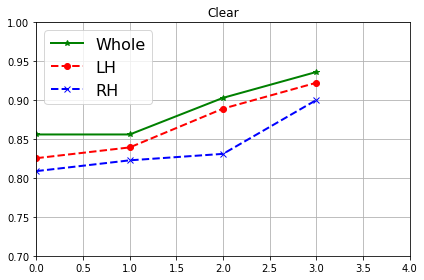

In [42]:
axis_font = {'fontname':'Arial', 'size':'15'}
#tw1=tad.iloc[1:,0];Acdw1=tad.iloc[1:,1];
tw1=a.iloc[0:,0];Acdw=a.iloc[0:,1];Acdlh=a.iloc[0:,2];Acdrh=a.iloc[0:,3]
# plt.plot(tw1,Acdw1,c='g')
plt.plot(tw1,Acdw,'g',linewidth=2,marker='*')
plt.plot(tw1, Acdlh,'--r',linewidth=2,marker='o')
plt.plot(tw1, Acdrh,'--b',linewidth=2,marker='x')
plt.title("Clear")
plt.xlim(0,4)
plt.ylim(0.7,1)
plt.grid(True)
plt.tight_layout()
plt.gca().legend(('Whole','LH','RH'),fontsize=16,loc='best')
# plt.savefig('whole_acc_timem.eps')
# plt.savefig('whole_acc_timem.tif')
plt.show()

In [43]:
len(clf.best_estimator_.support_vectors_)*100.0/(X_train.shape[0])

38.30673143650243

In [44]:
# dall

In [45]:
X_train.shape

(1441, 136)

In [46]:
type(whc)

pandas.core.frame.DataFrame

In [47]:
Ffe=pd.concat([whc,lhacau,rhacau],axis=1, keys=[ "Whole", "LH", "RH"])
Ffe

,Whole,LH,RH
,0,0,0
0,0.925208,0.919668,0.897507
1,0.911289,0.908641,0.882917


In [48]:
bb=a.iloc[:,1:]

In [49]:
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
bandallnoise=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
bandallnoise
# bandallclean.to_csv(wrpath+str(rs)+'Clear_band.csv')

,Whole,LH,RH
,0,0,0
0,92.520776,91.966759,89.750693
1,91.128871,90.864136,88.291708
0,85.595568,82.548476,80.886427
1,85.595568,83.933518,82.271468
2,90.304709,88.919668,83.102493
3,93.628809,92.243767,90.027701


In [50]:
clear=bandallnoise.values[1,:].tolist()
noise=bandallnoise.values[2,:].tolist()

In [51]:
clear

[91.12887112887114, 90.86413586413586, 88.29170829170828]

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


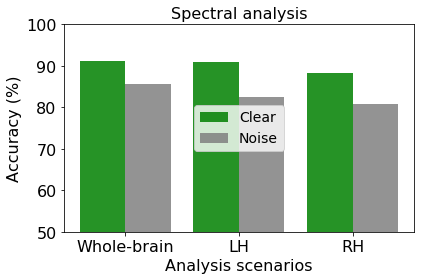

In [52]:
# clear=bandallclean.values[1,:].tolist()
# noise=bandallclean.values[2,:].tolist()
n_groups = 3
# clear = (61.29,54.83,54.83,61.29)
# noise = (85, 62, 54, 20)
#Random shuffle
# clear = [96.24,94.63,91.12]
# noise = [92.79,92.24,91.96] 
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Noise') 
plt.xlabel('Analysis scenarios',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Spectral analysis',**axis_font)
plt.ylim(50,100)
plt.xticks(index + bar_width-0.2, ('Whole-brain','LH', 'RH'),**axis_font)
# plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14,loc=10)
# plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
clear=bandallnoise.values[2:,0].tolist()
noise=bandallnoise.values[2:,0].tolist()

In [54]:
clear

[85.59556786703601, 85.59556786703601, 90.30470914127424, 93.62880886426593]

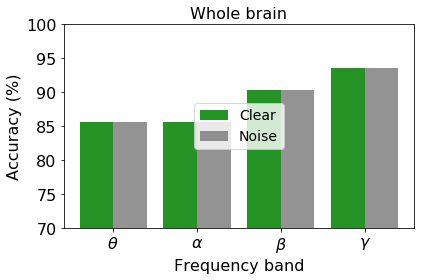

In [55]:
n_groups = 4
#Random shuffle
# clear = [67.74,70.97,54.84,48.38]
# noise = [54.84,45.16,38.71,45.16] 
# create plot
axis_font = {'fontname':'Arial', 'size':'16'}
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.40
opacity = 0.85
rects1 = plt.bar(index, clear, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Clear')
 
rects2 = plt.bar(index + bar_width, noise, bar_width,
                 alpha=opacity,
                 color='gray',
                 label='Noise') 
plt.xlabel('Frequency band',**axis_font)
plt.ylabel('Accuracy (%)',**axis_font)
plt.title('Whole brain',**axis_font)
plt.ylim(70,100)
#plt.xticks(index + bar_width-0.2, ('Theta','Alpha', 'Beta', 'Gamma'))
plt.xticks(index + bar_width-0.2, (r'$\theta$',r'$\alpha$', r'$\beta$', r'$\gamma$'),**axis_font)
plt.yticks(**axis_font)
plt.legend(fontsize=14,loc='center')
# plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

#### Writing into a csv file

In [56]:
bandallnoise

,Whole,LH,RH
,0,0,0
0,92.520776,91.966759,89.750693
1,91.128871,90.864136,88.291708
0,85.595568,82.548476,80.886427
1,85.595568,83.933518,82.271468
2,90.304709,88.919668,83.102493
3,93.628809,92.243767,90.027701


In [57]:
# wrpath="/home/sultan/EEG/Source_level_frequency_analysis/Results/"
# bandallnoise=pd.concat([Ffe*100,bb*100],axis=0)
# # bandallclean.iloc[0:,:]
# bandallnoise
# bandallnoise.to_csv(wrpath+str(rs)+'Noise_band.csv')
# wrpath+str(rs)+'Noise_band.csv'

In [58]:
rs

30